In [106]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


# links to the comments about etsy payments

#    	https://www.ecommercebytes.com/C/abblog/blog.pl?/pl/2018/4/1524006722.html 

# 	https://www.hannalisahaferkamp.com/blog/etsy-fees-how-to-figure-out-what-you-really-pay-for-your-etsy-shop

# 	https://www.wsj.com/articles/online-craft-marketplace-etsy-raises-fees-on-sellers-using-its-platform-1528994220 

# 	https://community.etsy.com/t5/Managing-Your-Shop/PayPal-or-Etsy-Payments-Which-one-is-better/td-p/19392077 

# 	https://www.ecommercebytes.com/C/blog/blog.pl?/pl/2019/4/1554995045.html 
	
# 	https://www.reddit.com/r/Etsy/comments/bbz7m1/action_required_switch_to_integrated_paypal/ 

# 	https://www.etsy.com/seller-handbook/article/new-etsy-payments-option-shoppers-can/984350788745

In [107]:
comments_2018 = ["It is the same thing that Amazon has done for years.  And I suspect that when Ebay starts to handle the money they will do the same thing.As many people do, I pay this kind of stuff with my credit card that earns me cash back bonuses.  It is a nice way to build up a little extra spending money.  But I also understand why Etsy is doing this.  It will certainly save them money and labor.I do however hope they come up with better reports soon.","All it means (in real terms) is that poor sales by Etsy arent enough to fund the growth of the company and sustain it through day to day operations.They are spending more then they take in.They didnt do this to help anyone - lets not be naive. 'But Amazon does it' is not a reason for ANYTHING - but yet its the battle cry for anyone who needs to explain away a sites bad behavior.Sure eBay will do it - to ensure seller compliance.The money you make ISNT a paycheck where your employer deducts taxes and Fica.You make a sale and you pay the venue in the time frame they allotted to you. Its not hard, its not complicated - unless the site you run, cant come up with the cash to fund its day to day operations.Plus ... wher else are you going to go to sell your stuff? Amazon isnt the place, and eBay is as crooked as Al Capone aka they know you have no choice - so its ok to squeeze you.Others here will say its all normal and ok - YOU be the judge.","It's crazy how these venues never stop taking more, it's either control or money,The funny part is most sellers just accept it, and the venue then moves on to the next creative cash grab or takes more controlI personally do not accept it, and will never accept it ,  we will punish etsy just like ebay  for this thru off etsy sales, listing less items,  and using less of their services, like promotions and buying postage.The gains they think they are getting,from us will be offset ten fold in what they loose. , I'd advise every seller to do the same,  ","I don't like this at all.  I've done bookkeeping all of my life for various companies.  I want to see all income coming in and all expenses going out as separate line items.  I don't want my sales applied to my expenses.  This may be a deal breaker for me."," Last year when Etsy demanded sellers turn over their bank account information, I closed my shop. So I knew something like taking their money when they want was bound to happen. No one has the right to touch anyone else's money without permission. So stop giving Etsy permission and close your stores. People need to start making a stand and stop being sheep. My handcrafted items are selling just as well on Bonanza and elsewhere.","Etsy doesn't give one hoot about sellers. Sellers are just their piggy bank. We have an etsy shop and this will destroy our Cashflow. We sell stickers and tend to do volume sales and shipping. So all it will take is one lean week when we ship a lot of orders (i.e. Run up a bill in one day) and now suddenly we have no income flow. If Etsy cared about ease they'd create a separate account to segregate the shipping fees. That single handelst would ease billing and payment issues down to about 0. They have done nothing but milk sellers and screw with settings for over a year. This isn't even a veiled attempt at lining their pockets. They don't seem to get that this isn't their money to manage. They seem to think sellers are their employees.","Thank you very much for this I made a sale Total price with tax and shipping was $18.17 and Etsy only deposited $14.49 I did the math of supposedly the 5% and the 3% plus other percentages and on top of that the .20 for depositing directly into your account but it does not add to $3.68 I might be doing the math wrong but is alot of money what they charge it leaves me with the $14.49 and then I have to pay $7.75 for shipping that is going to leave me with $6.74 for an item that I am selling for $10.00. Do you happened to know any other platforms where I can sell that don't charge that much I am currently selling Face Masks.","I am going crazy with all these transaction fees (5%) and a SALE fee of almost the same amount im seeing every time i make a sale. I dont know where that comes from or what it means. you dont mention it here either. Literally every time i make a sale i see a 'transaction' and 'sale' fee. im in Canada. i cnat find anything on google or even etsy. this is an extra $2.5 on top of all the crap im paying.","is the % listed on the 'order fee' link you posted actually the 'payment processing fee'? i didn't think etsy charged 3% (for US) per order, plus and additional 3% for processing credit cards.","Highway robbery! Thank you for this.","You're so welcome!","Many have been selling on Etsy solely because it was less expensive than eBay, Amazon, Shopify, or posting own website (using WordPress plus Magento, Zoho, or other eCommerce plug-in) and using PayPal. My guess is PayPal and Shopify will benefit most from Etsy's increase.","Millions of sellers are paying Amazon 15% and succeeding.   Sellers who can't afford a 5% commission don't have a working business model.","Wheres Liz Warren to complain that big business is taking from the little guy and that it is all Trump's fault","The sentence 'It also will begin charging sellers a 5% fee to cover shipping costs' is an error. The author misinterpreted the press release. Actually, ETSY will charge a 5% fee to the total of the product price and shipping cost, rather than just to the price. This removes the incentive for sellers to hide some of the product's actual price in the shipping fee.","i get what you're saying about hiding product fee in shipping fee, but is it really misrepresentation by the author? or another way of saying the same thing?"]

comments_2019 = ["I get more sales through Etsy payments (Visa, MC, etc) than I do people using PayPal.That said? I offer both for a reason. There are people loyal to both sides of the fence and don't want to use the other.As a shopper, I personally -always- use PayPal to purchase when shopping on Etsy.","All shoppers have a choice of Paypal and Etsy Payments in countries where Etsy Payments is available. The buyer does not know if the seller has integrated or separated payments for the two. So it makes no difference in sales. If there are differences in sales, they are not related to the payment method but to other considerations. There are Help Center articles about how Paypal and Etsy Payments work, if you would like to read more.","I offer both Etsy Payments and Paypal in my Etsy shops as it makes it easy for a buyer to choose their method of payment. Win win- for the buyer and me too!","All buyers see both Paypal and Etsy Payments as payment options, regardless of whether a seller has standalone or integrated Paypal. You cannot tell by looking at a shop or listings which arrangement the shop has.","As you are in Turkey, currently a country which doesn’t have Etsy Payments available to its sellers (and if it did it would be mandatory for you to use anyway) it’s not really something you need to worry about.","ahh ok well unless they have had a store open for a while and opted to keep stand alone paypal back before etsy changed things then I would offer both if it's an option. If they don;t have a store yet and/or don't already have stand alone pp set up they they won't even have the option for that, it will be integrated with etsy payments.","Disgusting behavior, no venue should be able to collect and disperse funds, its a conflict of interest and should be immediately outlawed.","For me this means I will always have to transfer money into my Paypal account all the time as I purchase stationary and packaging with that account. I like the fact that I have stand alone PP and annoyed at etsy doing this, they will be insisting on free shipping next! They have not taken into account the many sellers who rely on Paypal.", "What a bunch of predictable shitheads!  This could really be the straw that breaks the camel's back for many of us.  Absolutely livid about this, but not surprised, as Etsy has become one big greedy self-satisfied monster!  I am based in the UK and monthly payments from Etsy to my bank account typically take around 4 days to show, although I appreciate that some of that time is down to bank processing and not Etsy.  I use my Paypal account to buy new stock and components for handmade pieces as well as being able to do an immediate transfer from Paypal to my bank account without having to wait 4 days for it to process.  Seriously p'eed off!","My funds are transferred into my account the next day. I use pirateship for my shipping, because it is typically cheaper. I have my paypal debit card linked to the pirateship account so I get cash back for my postage. Fortunately, I have not had the problems others had with the debacle in February. After that, I deleted my backup funding source, which seemed to be a problem with that money grab....So far, so good....I hope I did not just jinx myself....","Just a cash grab.. it should be illegal for them to get the interest accrued on the money they will be holding waiting for disbursement, any interest should be paid to the sellers, those funds are 'theirs' not Etsy's.","I do not like this as a seller. There have been a few times Etsy payment funds were tied up with tech issues but I still could access my PayPal funds if the buyer had paid that way. I also use my PayPal debit card a lot with those funds. I’m sure I will get used to it but there is a reason I opted out of integration...","Because they make more money this way. It has nothing to do with buyer protection & consistency as they claim, because the majority of countries who sell on Etsy cannot use Etsy Payments - it is only available in fewer than 40 countries. So there are tons of PayPal only shops on Etsy, some of them quite large. Ever since Etsy went public, they make a change around this time of year that makes them more money (forcing EP, raising fees were the last 2), then they get the benefit of that new boost in their financial figures for 12 months. Then, a year later, they have to find another new source of income to keep up their growth. I've been predicting this one for a while, although I originally thought it would be next year. But the key takeaway is - expect things to become more expensive for at least some sellers each year around April.","My assumption is that if they started to implement something, they would finish it. Now it's turn for old shops with legacy settings.","The bigger notice that I read had more discussion on buyer protection if it was under one platform. There are some issues that if they come up cannot be resolved thru Etsy unless its been paid thru Etsy payments.","I got the message this morning. I don’t love it but I’d say 85% of my customers pay with Etsy payments already. I liked having money sitting in PayPal to pay for supplies but I’ll live. I’m wondering though if you could have customers check out with “other” and then send them a PayPal invoice to pay. It’s clunky, but it’s a work around that might be possible."]

comments_2020 = ["How is this supposed to work with items that cannot be returned, as in, intimate garments and some other clothing? Or custom made, bespoke items that couldn't be sold to any other client because there is a date or name on the item? I have received returns with perfume or hair goop in them (and I do not use perfumes or hair goop (severe allergies) and to keep my shop rating up, I HAD to take back those returns and then destroy them, which annoys the H*ll out of frugal me, especially when I am supposed to remake that item for the client, using the same fibers/material and it is a rare fiber.","GET READY FOR BUYERS REMORSE AND 'RETURNS'... There is no need for Klarna unless the buyer is flat-out broke. Because, why not just put a purchase on a standard charge card? There is a Financial company, here in Oregon, that serves as a broker for in-store charge cards for places like Wayfair, Home Depot and Signet Jewels. These types of credit lines are expensive to support 'high risk' customers with either bad credit or no credit, while having to pay a boatload in interest. As a OOAK jeweler, I've never worked with payment plans because I do not want to work with a customer who cannot comfortably afford to spend money, and I never have 'returns'. A spendaholic with no money = lots of 'returns' and buyers remorse.","Very good solution for customers.. Where can one apply??","Yes, I'm with her...Do we have to go in and sign up for accepting payments and when does it start two valid questions. Etsy never made clear...","It's a good idea. What a pity it's not yet available either for Italy or for other countries. Hopefully it will arrive soon, I believe that such a thing gives the possibility to really increase sales","There’s a site called AfterPay that a lot of retailers use that is similar to this. When I needed to return shoes I bought with afterpay, I couldn’t until I paid the amount off. Then I could return them and get my refund. Not sure if this is how this will work, but from what I’ve read it sounds similar.","I was just listening to a podcast about instalment payments. It's a lot of work to keep tabs on, repeat invoice, check-in on potential late payments etc., so it's great Etsy are taking care of that!","Think of Klarna like a small credit card. Klarna pays Etsy and Etsy pays you in full. You ship right away and buyer gets items. Then the buyer owes the money to Klarna and they pay it back to Klarna in installments or they can even choose to pay off early. But you've already been paid. I'm happy they are offering this, maybe it will help buyers splurge on larger orders. :-)","I'm concerned if a customer makes a klarna purchase, makes 2 payments but wants to bail on the other 2 (or however many there are), and we've already started sourcing materials for that order/or have gone to production, then what happens?","I think we ( as sellers ) should have the option as to whether or not we want to take a gamble on this new thing. this could go very badly for sellers if there was a sudden wave of non payment. did etsy secure an insurance underwriter to cover losses so they can pay the seller if a customer welches out on payment? they need to do their fiduciary duty to protect the sellers. doing something like this especially since i have never heard of klarna or seen any kind of advertising on this company.","We don't care. This is just like any other credit card. It isn't our business what terms the customer choses. We have no reason to know or care.","I am wondering the same. I don't accept returns in my shop and if a buyer changes their mind, how would it work in that case.. this will just make things more complicated. I hope in such case Etsy also enforces no return policy.","One of the best ideas Etsy has had in a long time.","This is amazing! Thank you Etsy!","Sounds good!! Thanks.","I just saw this on my dashboard and not sure how I feel about it yet. Do we ship the item before the full payments are made? If so I can see many problems with this and having to keep track of who to ship to at a later date. Also, if we ship when they order how is that fair? Many people will not make the remainder of the payment if they already have the item. Is this an opt in opt out deal or is this mandatory? As a buyer I like it, it means I can buy more supplies :)"]


In [108]:
# gets sentiment of comments using vader
def get_sent(comments):
    scores = []

    vader = SentimentIntensityAnalyzer()
    for comment in comments:
        scores.append(vader.polarity_scores(comment))
# finds average sentiment of all comments
    df = pd.DataFrame(scores)
    avg_score = dict(df.mean())
    return avg_score
 

In [109]:
sent_for_2018 = get_sent(comments_2018)

In [110]:
sent_for_2019 = get_sent(comments_2019)

In [111]:
sent_for_2020 = get_sent(comments_2020)


Text(0.5, 1.0, 'Average Sentiment of Etsy Payments Over The Years ')

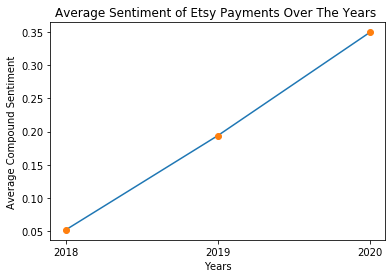

In [112]:
# displays graph
years_sent = [sent_for_2018['compound'],sent_for_2019['compound'],sent_for_2020['compound']]
years = [2018,2019,2020]
plt.plot(years,years_sent)
plt.plot(years,years_sent,"o")
plt.xticks(years)
plt.xlabel("Years")
plt.ylabel("Average Compound Sentiment")
plt.title("Average Sentiment of Etsy Payments Over The Years ")



# Compound score meaning:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

In [125]:
# creates word cloud
def show_word_cloud(comments):
    stopwords = STOPWORDS
    wc = WordCloud(
        background_color='black', 
        colormap='Oranges', 
        collocations=False, 
        stopwords = STOPWORDS,
        height= 1000,
        width =700,
        max_words = 35

    )
    text=(" ").join(comments)
    wc.generate(text)
    plt.figure( figsize=(20,10) )
    plt.imshow(wc, interpolation = 'bilinear')

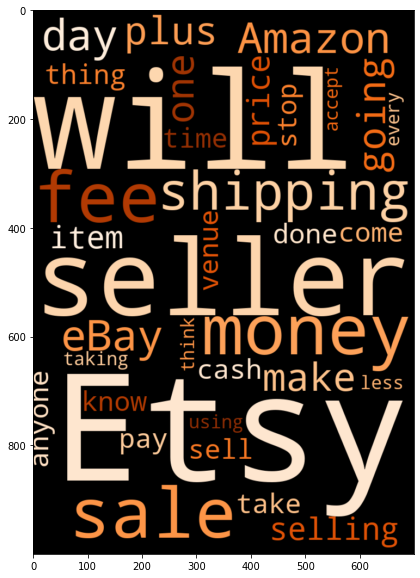

In [126]:
show_word_cloud(comments_2018)

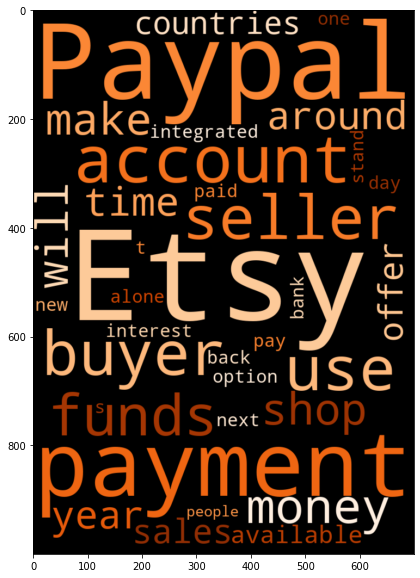

In [127]:
show_word_cloud(comments_2019)

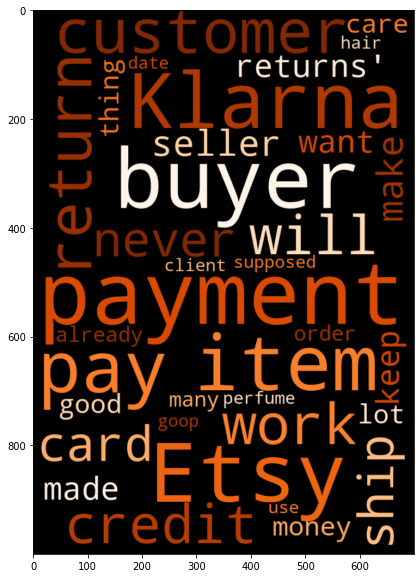

In [128]:
show_word_cloud(comments_2020)